### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from bokeh.plotting import *
from bokeh.models import ColumnDataSource

# output to notebook
output_notebook()

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

### Data

In [2]:
train = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/mnist/train.csv")
test = pd.read_csv("/Users/pbezuhov/git/Kaggle/data/mnist/test.csv")

train_y = train.label
train_x = train.drop("label", axis=1)

### Plot examples of the digits

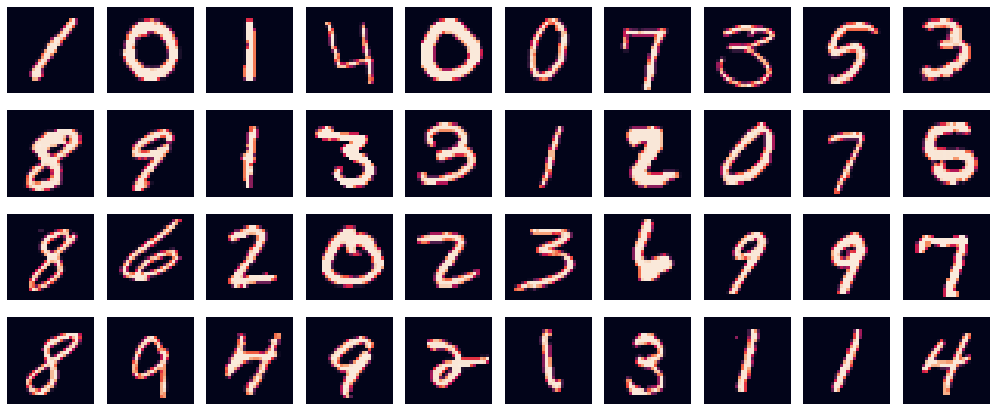

In [3]:
# plot some of the numbers
plt.figure(figsize=(14,6))

for i in range(0,40):
    plt.subplot(4,10, i + 1)
    grid_data = train_x.iloc[i].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

### Perform Principal Component Axis (PCA) on the dataset

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import *

REDUCED_NUM = 2000

# Taking only the first N rows to speed things up
x_reduced = train_x[:REDUCED_NUM].values
y_reduced = train_y[:REDUCED_NUM]

# Standardising the values
x_std = StandardScaler().fit_transform(x_reduced)

# Call the PCA method with 5 components. 
pca = PCA(n_components=2)
pca.fit(x_std)
x_pca = pca.transform(x_std)

pca_data = pd.DataFrame({"x": x_pca[:,0], "y": x_pca[:,1], "label": y_reduced})

colors = ["brown", "purple", "black", "blue", "orange",
           "green", "lightblue", "gray", "yellow", "lightgreen"]
colors = {i: colors[i] for i in range(10)}
colors = pca_data.label.map(colors)

source = ColumnDataSource(data=dict(x=pca_data.x, y=pca_data.y, label=pca_data.label, colors=colors))

TOOLS = "pan,wheel_zoom,box_zoom,reset,box_select,lasso_select".split(",")
hover = HoverTool(tooltips=[
    ("label", "@label"),
])
TOOLS.append(hover)

# create a new plot and add a renderer
p = figure(tools=TOOLS, width=750, height=350, title="PCA of MNIST")
p.circle('x', 'y', color="colors", source=source)

# show the results
show(p)